<a href="https://colab.research.google.com/github/Osterne/codes_book/blob/main/05_mod_01_ap_sup_regressao_04_mlg_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

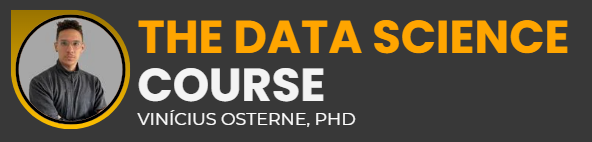

---

# Aprendizado Supervisionado - Modelos Baseados em Regressão

### Modelos Lineares Generalizados - Introdução

---
<br><br><br><br><br>

## Relembrando o Modelo Linear Clássico (MLC)

**Modelo estrutural (com erro):**

$$
Y = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p + \varepsilon
$$

Mas, na verdade,o que modelamos é a **média condicional**, assumindo que $\mathbb{E}[\varepsilon \mid X] = 0$. Assim, temos:

$$
\mathbb{E}[Y \mid X] = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p
$$

**Suposições usuais do MLC**
- $ \mathbb{E}[\varepsilon \mid X] = 0 $ (como já fizemos)
= Normalidade dos erros: $ \varepsilon \sim \mathcal N(0,\sigma^2)$
- Linearidade nos parâmetros
- Homocedasticidade: $ \mathrm{Var}(Y \mid X)=\sigma^2$
- Tipicamente $Y$ é contínua e não limitada


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     968.9
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           1.31e-52
Time:                        22:36:28   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4302      0.341     10.072      0.0

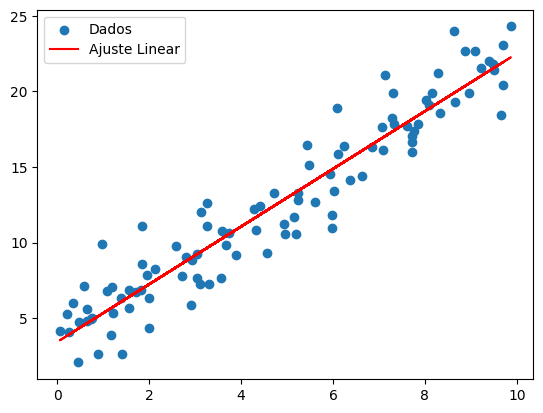

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Gerar dados simulados
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 + 2*X.flatten() + np.random.normal(0, 2, 100)

# Ajustar modelo linear clássico
X_const = sm.add_constant(X)
modelo = sm.OLS(y, X_const).fit()

print(modelo.summary())

# Plotar
plt.scatter(X, y, label="Dados")
plt.plot(X, modelo.predict(X_const), color="red", label="Ajuste Linear")
plt.legend()
plt.show()


<br><br><br>

---

## 📌 E quando não temos normalidade?

- Durante muitos anos, os **modelos lineares normais** foram aplicados como tentativa de descrever a maioria dos fenômenos aleatórios.

- Mesmo quando a variável resposta **não atendia à suposição de normalidade**, era comum aplicar **transformações** para tentar alcançar:
  - **Normalidade** dos resíduos,  
  - **Constância de variância**,  
  - **Linearidade** na média condicional.  

A transformação mais conhecida é a de **Box & Cox (1964)**:

$$
z =
\begin{cases}
\dfrac{y^\lambda - 1}{\lambda}, & \lambda \neq 0 \\
\log(y), & \lambda = 0
\end{cases}
$$

onde $y>0$ e $\lambda$ é um parâmetro a ser estimado.

O objetivo era "forçar" normalidade e homocedasticidade, mas na prática **raramente um único valor de $\lambda$ resolve todos os problemas** (Box & Draper, 1987).  


<br><br><br>

---

### 🌐 A virada nos anos 70
- Com o avanço computacional da década de 1970, modelos que dependiam de estimação iterativa começaram a ser mais usados.

- Foi nesse contexto que **Nelder & Wedderburn (1972)** apresentaram os **Modelos Lineares Generalizados (MLGs)**.

- Uma proposta inovadora, pois
  - A variável resposta $Y$ **não precisa mais ser normal**: ela pode pertencer à **família exponencial** (Normal, Bernoulli, Poisson, Gamma, ...).  
  - A relação entre a média $\mu$ e o preditor linear $\eta = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p$ pode ser feita por meio de uma **função de ligação $g$**.  

Exemplos:  
- Para contagens: assumir $Y \sim \text{Poisson}(\mu)$ com $\log(\mu) = \eta$ (garantindo $\mu > 0$).  
- Para proporções: assumir $Y \sim \text{Binomial}(n, \mu)$ com $\log\left(\tfrac{\mu}{1-\mu}\right) = \eta$ (garantindo $0 < \mu < 1$).  


<br><br><br>

---

### 🔑 Diferença fundamental

- **No Modelo Linear:**  
  - A suposição é feita sobre o **erro**:  
    $$
    \varepsilon \sim N(0, \sigma^2)
    $$
  - O modelo é escrito como:  
    $$
    Y = X\beta + \varepsilon
    $$

- **No MLG:**  
  - **Não existe um termo de erro explícito** no modelo.  
  - A suposição é feita diretamente sobre a **variável resposta**:  
    $$
    Y \mid X  \sim  \text{Distribuição da família exponencial (Normal, Bernoulli, Poisson, Gamma, …)}
    $$
  - A variabilidade de $Y$ vem da própria distribuição assumida, e não de um erro aditivo.




<br><br><br>

---



### 💡 Ideia do MLG

O **Modelo Linear Generalizado (MLG)** é definido por **três componentes principais**:

1. **Componente aleatório**  
   A variável resposta $Y_1, Y_2, \dots, Y_n$ é assumida **independente**, cada uma com distribuição na **família exponencial**:  

   $$
   f(y_i;\theta_i,\phi) = \exp\left\{ \frac{y_i \theta_i - b(\theta_i)}{a(\phi)} + c(y_i,\phi) \right\}
   $$

   - Média:  
     $$
     \mu_i = \mathbb{E}[Y_i] = b'(\theta_i)
     $$
   - Variância:  
     $$
     \mathrm{Var}(Y_i) = a(\phi)\,b''(\theta_i) = \phi^{-1} V(\mu_i)
     $$
     onde $V(\mu)$ é a **função de variância** e $\phi^{-1}$ é o **parâmetro de dispersão**.



2. **Componente sistemático**  
   As variáveis explicativas $X_{i1}, \dots, X_{ip}$ entram em um **preditor linear**:  

   $$
   \eta_i = \beta_0 + \beta_1 X_{i1} + \cdots + \beta_p X_{ip} = X_i \beta
   $$



3. **Função de ligação**  
   Relaciona a média $\mu_i$ ao preditor linear:  

   $$
   g(\mu_i) = \eta_i
   $$

   - Exemplo:
    - Identidade: $g(\mu) = \mu$
    - Logito: $g(\mu) = \log\frac{\mu}{1-\mu}$
    - Log: $g(\mu)=\log(\mu)$
    - etc.


Ou seja, mantemos o **preditor linear**:  
  $$
  \eta = X\beta = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p
  $$

Mas modelamos a **média da resposta** usando uma **função de ligação** $g$:  
  $$
  g\!\big(\mathbb{E}[Y \mid X]\big) = \eta
  $$




<br><br><br>

---


👉 Assim, o MLG pode ser descrito como:

- **Aleatório:** $Y_i \sim$ família exponencial, $\mu_i = b'(\theta_i)$  
- **Sistemático:** $\eta_i = X_i \beta$  
- **Ligação:** $g(\mu_i) = \eta_i$

A suposição é feita diretamente sobre a **distribuição da resposta $Y$**, escolhida de acordo com o tipo de dado (no MLG não supomos normalidade dos erros).


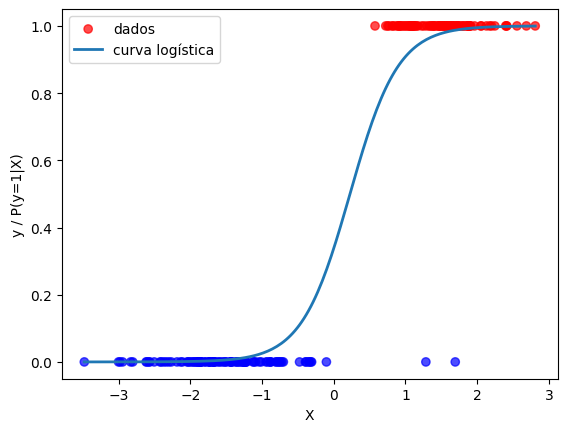

In [2]:
#Exemplo com regressão logística

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Dados binários com APENAS 1 feature
X, y = make_classification(
    n_samples=200,
    n_features=1,
    n_informative=1,   # precisa caber em n_features
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=1.5,     # separação entre classes (ajuste se quiser)
    flip_y=0.02,       # ruído de rótulo
    random_state=42
)

# Ajuste da regressão logística
logit = LogisticRegression().fit(X, y)

# Curva de probabilidade prevista ao longo do eixo X
x_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_prob = logit.predict_proba(x_plot)[:, 1]

# Plot
plt.scatter(X, y, c=y, cmap="bwr", alpha=0.7, label="dados")
plt.plot(x_plot, y_prob, linewidth=2, label="curva logística")
plt.xlabel("X")
plt.ylabel("y / P(y=1|X)")
plt.legend()
plt.show()


---
## E o que vem a seguir?

Agora que entendemos **por que precisamos dos Modelos Lineares Generalizados (MLGs)**,  
nas próximas aulas vamos estudar seus **casos particulares**, que correspondem às situações mais comuns em aplicações reais.

###  Casos particulares dos MLGs que veremos:

- **Modelos para dados de contagem**
  - Regressão de Poisson
  - Regressão Binomial Negativa

- **Modelos para respostas contínuas positivas**
  - Regressão Gamma
  - Regressão Inversa-Gaussiana  

- **Modelos para variáveis categóricas**
  - Regressão logística
  - Regressão probit
  - Regressão logística multinomial
  - Regressão logística ordinal

Ao longo das aulas, também veremos **extensões importantes**:
- Modelos com sobredispersão (quase-verossimilhança)  
- Modelos mistos generalizados (GLMMs)  
- Modelos aditivos generalizados (GAMs)  
- Outras funções de ligação (complementary log-log, log-log, etc.)


<br><br><br>

---
## Resumo:  
O MLG é um arcabouço unificado. Cada caso particular surge da escolha de:  
1. **Distribuição da resposta $Y$** (Binomial, Poisson, Gamma, etc.)  
2. **Função de ligação $g$** (logit, log, identidade, inversa, etc.)  
3. **Preditor linear** $\eta = X\beta$  
